In [2]:
from qiskit import *

In [3]:
# Load IBM Quantum Computer Account
# IBMQ.save_account()
if not IBMQ.active_account():
    IBMQ.load_account()

In [4]:
# Print out all the hardware available
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [4]:
# Choose backend, in this case we choose nairobi
backend = provider.get_backend('ibm_nairobi')

In [5]:
# Create "hello world" -> Check if our job is able to run on a quantum computer
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

In [6]:
circuit = QuantumCircuit(qr, cr)

In [7]:
%matplotlib inline

In [8]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [9]:
circuit.h(qr[0])

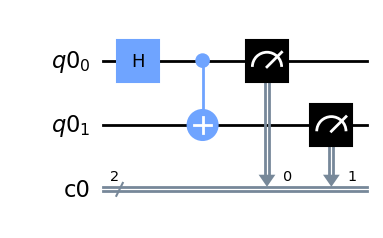

In [11]:
circuit.cx(qr[0], qr[1])
circuit.measure(qr, cr)
circuit.draw(output='mpl')

In [12]:
job = execute(circuit, backend=backend)

In [13]:
from qiskit.tools.monitor import job_monitor

In [ ]:
# job_monitor(job)

Job Status: job is queued (65)

In [1]:
from qiskit.tools.visualization import plot_histogram

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))